### Mini batch
- 기존에 사용했던 전체 데이터를 대상으로 한 번에 경사 하강법을 수행하는 방법은 '배치 경사 하강법'이라 한다.
- 배치 경사 하강법은 전체 데이터를 사용하므로 W가 최적값에 수렴하는 과정이 안정적이다.
- 하지만 시간이 너무 오래 걸리기 때문에, 나누어서 하는 방법이 필요하고 이를 '미니 배치 경사 하강법'이라 한다.
- 미니 배치 경사 하강법은 미니 배치 단위로 경사 하강법을 수행하는 방법이다.
- 전체가 아닌 일부 데이터를 사용하기 때문에 W가 최적값에 수렴하기 위해 많이 헤맬 수 있다.
- 하지만 상대적으로 훈련 속도가 빨라서 시간적 효율이 높다.

<img src="./images/mini_batch.png" width="500px">

In [1]:
import pandas as pd

m_df = pd.read_csv('./datasets/medical_cost.csv')
m_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [2]:
m_df.sex.value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [3]:
m_df.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [4]:
m_df.region.value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [5]:
from sklearn.preprocessing import LabelEncoder

pre_m_df = m_df.copy()
columns = ['sex', 'smoker']
label_encoders = {}

for column in columns:
    encoder = LabelEncoder()
    result = encoder.fit_transform(pre_m_df[column])
    label_encoders[column] = encoder.classes_
    pre_m_df[column] = result

label_encoders

{'sex': array(['female', 'male'], dtype=object),
 'smoker': array(['no', 'yes'], dtype=object)}

In [6]:
pre_m_df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830
1334,18,0,31.920,0,0,northeast,2205.98080
1335,18,0,36.850,0,0,southeast,1629.83350
1336,21,0,25.800,0,0,southwest,2007.94500


In [7]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# sparse를 False로 설정하면 넘파이 배열, True는 희소 행렬
one_hot_encoder = OneHotEncoder(sparse_output=False)
result = one_hot_encoder.fit_transform(pre_m_df[['region']])

pre_m_df = pd.concat([pre_m_df, 
                      pd.DataFrame(result, columns=one_hot_encoder.categories_).astype(np.int8)], 
                     axis=1)
pre_m_df

,age,sex,bmi,children,smoker,region,charges,"(northeast,)","(northwest,)","(southeast,)","(southwest,)"
0,19,0,27.900,0,1,southwest,16884.92400,0,0,0,1
1,18,1,33.770,1,0,southeast,1725.55230,0,0,1,0
2,28,1,33.000,3,0,southeast,4449.46200,0,0,1,0
3,33,1,22.705,0,0,northwest,21984.47061,0,1,0,0
4,32,1,28.880,0,0,northwest,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830,0,1,0,0
1334,18,0,31.920,0,0,northeast,2205.98080,1,0,0,0
1335,18,0,36.850,0,0,southeast,1629.83350,0,0,1,0
1336,21,0,25.800,0,0,southwest,2007.94500,0,0,0,1


In [9]:
pre_m_df = pre_m_df.drop(labels=['region'], axis=1)
pre_m_df

,age,sex,bmi,children,smoker,charges,"(northeast,)","(northwest,)","(southeast,)","(southwest,)"
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,0,1,0,0
1334,18,0,31.920,0,0,2205.98080,1,0,0,0
1335,18,0,36.850,0,0,1629.83350,0,0,1,0
1336,21,0,25.800,0,0,2007.94500,0,0,0,1


In [10]:
pre_m_df.columns = ['age', 
                    'sex', 
                    'bmi', 
                    'children', 
                    'smoker', 
                    'charges', 
                    'northeast', 
                    'northwest', 
                    'southeast', 
                    'southwest']

pre_m_df

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,0,1,0,0
1334,18,0,31.920,0,0,2205.98080,1,0,0,0
1335,18,0,36.850,0,0,1629.83350,0,0,1,0
1336,21,0,25.800,0,0,2007.94500,0,0,0,1


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'smoker'}>,
        <Axes: title={'center': 'charges'}>],
       [<Axes: title={'center': 'northeast'}>,
        <Axes: title={'center': 'northwest'}>,
        <Axes: title={'center': 'southeast'}>],
       [<Axes: title={'center': 'southwest'}>, <Axes: >, <Axes: >]],
      dtype=object)

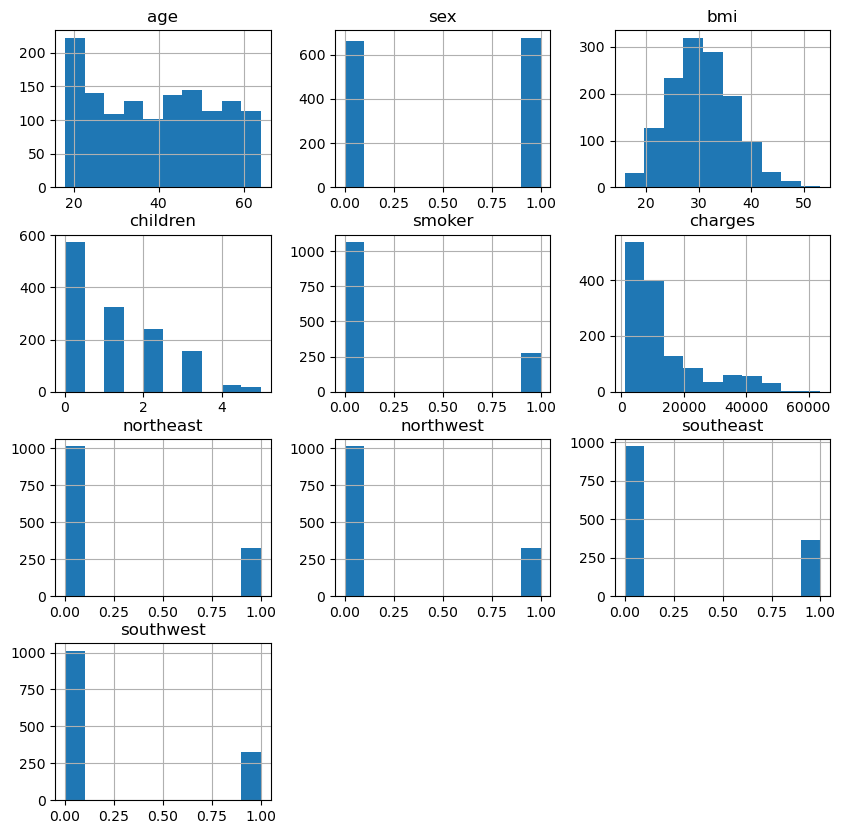

In [12]:
pre_m_df.hist(figsize=(10, 10))

<Axes: >

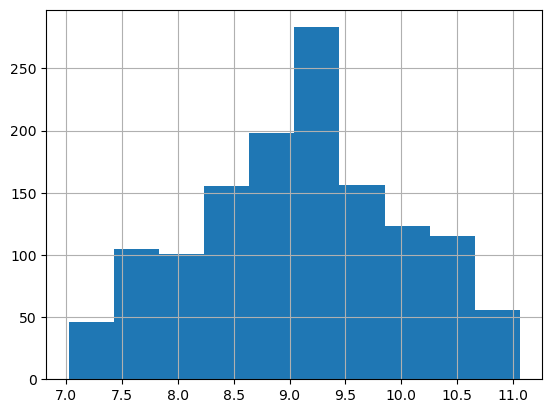

In [13]:
np.log1p(pre_m_df['charges']).hist()

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'smoker'}>,
        <Axes: title={'center': 'charges'}>],
       [<Axes: title={'center': 'northeast'}>,
        <Axes: title={'center': 'northwest'}>,
        <Axes: title={'center': 'southeast'}>],
       [<Axes: title={'center': 'southwest'}>, <Axes: >, <Axes: >]],
      dtype=object)

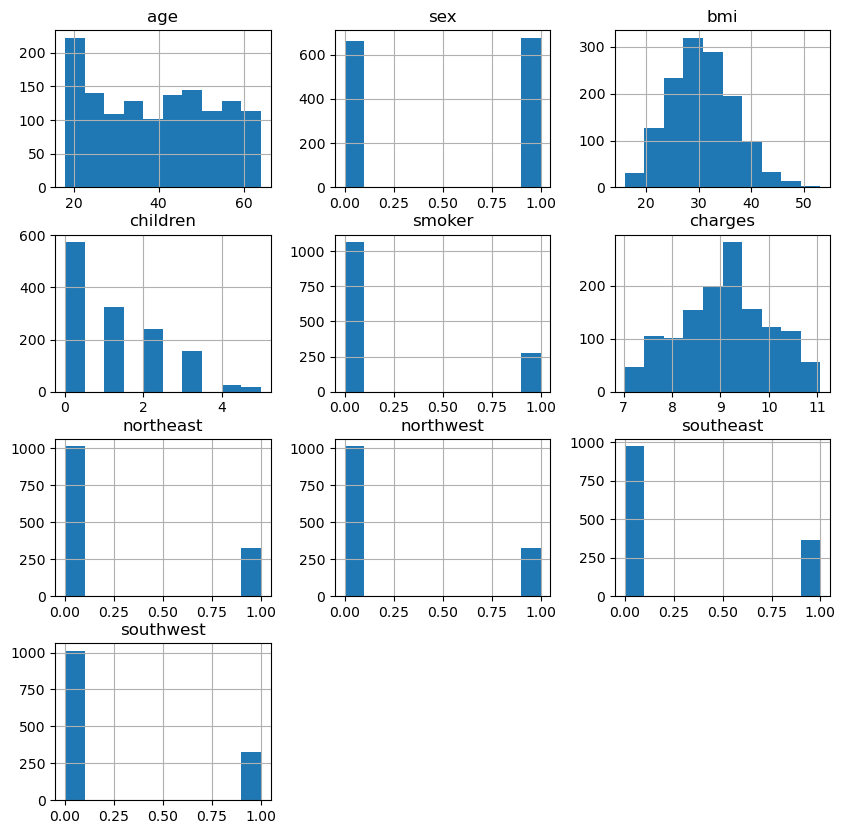

In [14]:
pre_m_df.loc[:, 'charges'] = np.log1p(pre_m_df['charges'])
pre_m_df.hist(figsize=(10, 10))

In [17]:
pre_m_df.corr()['charges'].sort_values(ascending=False)[1:]

smoker       0.665539
age          0.527807
children     0.161317
bmi          0.132678
northeast    0.043109
southeast    0.015803
sex          0.005644
northwest   -0.017830
southwest   -0.041633
Name: charges, dtype: float64

In [19]:
columns = ['smoker', 'age', 'children', 'bmi', 'charges']
pre_m_df = pre_m_df.loc[:, columns]
pre_m_df

,smoker,age,children,bmi,charges
0,1,19,0,27.900,9.734236
1,0,18,1,33.770,7.453882
2,0,28,3,33.000,8.400763
3,0,33,0,22.705,9.998137
4,0,32,0,28.880,8.260455
...,...,...,...,...,...
1333,0,50,3,30.970,9.268755
1334,0,18,0,31.920,7.699381
1335,0,18,0,36.850,7.396847
1336,0,21,0,25.800,7.605365


In [29]:
from sklearn.model_selection import train_test_split
import numpy as np
import torch
from torch.nn import Linear
from torch.nn.functional import mse_loss
from torch.optim import SGD
from torch.utils.data import TensorDataset, DataLoader

torch.manual_seed(124)

features, targets = pre_m_df.iloc[:, :-1], pre_m_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

X_train = torch.FloatTensor(X_train.values)
y_train = torch.FloatTensor(y_train.values).view(-1, 1)

X_test = torch.FloatTensor(X_test.values)
y_test = torch.FloatTensor(y_test.values).view(-1, 1)

td = TensorDataset(X_train, y_train)
dl = DataLoader(td, batch_size=100, shuffle=True) # Mini Batch 선언 

l_r = Linear(4, 1)

optimizer = SGD(l_r.parameters(), lr=0.0001)

epochs = 1000

for epoch in range(1, epochs + 1):
    for i, samples in enumerate(dl):
        
        X_train, y_train = samples

        H = l_r(X_train)
        loss = mse_loss(H, y_train)
    
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if epoch % 100 == 0:
            print(f'Epoch: {epoch}/{epochs}, Batch: {i + 1}/{len(dl)}, ', end='')
            for i, w in enumerate(list(l_r.parameters())[0][0]):
                print(f'W{i + 1}: {np.round(w.item(), 4)}, ', end='')
            print(f'b: {np.round(list(l_r.parameters())[1].item(), 4)}')
            print(f'loss: {np.round(loss.item(), 4)}')

Epoch: 100/1000, Batch: 1/11, W1: -0.2685, W2: 0.0696, W3: 0.3211, W4: 0.1896, b: 0.0652
loss: 2.7817
Epoch: 100/1000, Batch: 2/11, W1: -0.2684, W2: 0.0671, W3: 0.321, W4: 0.1877, b: 0.0652
loss: 1.9834
Epoch: 100/1000, Batch: 3/11, W1: -0.2684, W2: 0.0682, W3: 0.321, W4: 0.1886, b: 0.0652
loss: 2.1143
Epoch: 100/1000, Batch: 4/11, W1: -0.2683, W2: 0.0685, W3: 0.321, W4: 0.1893, b: 0.0653
loss: 2.8161
Epoch: 100/1000, Batch: 5/11, W1: -0.2682, W2: 0.0695, W3: 0.3209, W4: 0.1902, b: 0.0654
loss: 2.4986
Epoch: 100/1000, Batch: 6/11, W1: -0.2681, W2: 0.0678, W3: 0.3209, W4: 0.189, b: 0.0654
loss: 2.317
Epoch: 100/1000, Batch: 7/11, W1: -0.2681, W2: 0.0671, W3: 0.3209, W4: 0.1882, b: 0.0654
loss: 2.4392
Epoch: 100/1000, Batch: 8/11, W1: -0.268, W2: 0.0677, W3: 0.3208, W4: 0.1882, b: 0.0655
loss: 2.1823
Epoch: 100/1000, Batch: 9/11, W1: -0.2679, W2: 0.0701, W3: 0.3209, W4: 0.1901, b: 0.0656
loss: 2.3161
Epoch: 100/1000, Batch: 10/11, W1: -0.2679, W2: 0.0714, W3: 0.3209, W4: 0.1911, b: 0.065

In [37]:
from sklearn.metrics import mean_squared_log_error, mean_squared_error

def get_evaluation(y_test, prediction):
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    MSLE = mean_squared_log_error(y_test, prediction)
    RMSLE = np.sqrt(mean_squared_log_error(y_test, prediction))
    print('MSE: {:.4f}, RMSE: {:.4f}, MSLE: {:.4f}, RMSLE: {:.4f}'\
          .format(MSE, RMSE, MSLE, RMSLE))

In [38]:
# detach -> numpy 배열로 변환 
y_test = y_test.detach().numpy()

H = l_r(X_test)
prediction = H.detach().numpy()

In [39]:
get_evaluation(y_test, prediction)

MSE: 2.0656, RMSE: 1.4372, MSLE: 0.0215, RMSLE: 0.1466
